# Malware Analysis - CLEAN & WORKING

This notebook contains ONLY tested, working code.
All redundancy removed, all graphs tested and confirmed working.

In [1]:
# Load and prepare malware analysis data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from collections import Counter

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Try to load from updated CSV which has MITRE and threat_names data
csv_path = Path('output/analysis_results_offline.csv')
if csv_path.exists():
    df = pd.read_csv(csv_path)
    print(f"✓ Loaded updated CSV with {df.shape[0]} rows and {df.shape[1]} columns")
else:
    # Fallback to original CSV
    csv_path = Path('output/analysis_results.csv')
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        print(f"✓ Loaded CSV with {df.shape[0]} rows and {df.shape[1]} columns")
    else:
        print("✗ CSV file not found")
        df = None

✓ Loaded updated CSV with 100 rows and 56 columns


In [2]:
# Data info
if df is not None:
    print(f'Shape: {df.shape}')
    print(f'\nColumns:\n{df.columns.tolist()}')
    print(f'\nNull values:\n{df.isnull().sum()}')

Shape: (100, 56)

Columns:
['hash', 'family', 'source', 'status', 'detection_ratio', 'first_seen', 'last_seen', 'processes_count', 'files_written_count', 'files_deleted_count', 'registry_keys_set_count', 'dns_lookups_count', 'ip_connections_count', 'http_requests_count', 'mutexes_count', 'mitre_techniques_count', 'mitre_techniques', 'tags_count', 'tags', 'collected_date', 'error', 'mitre_technique_old', 'file_path', 'status_code', 'process_count', 'command_count', 'http_request_count', 'dns_query_count', 'ip_connection_count', 'files_read_count', 'registry_written_count', 'registry_read_count', 'mutex_count', 'services_created_count', 'services_started_count', 'memory_dump_count', 'scheduled_task_count', 'mitre_technique_count', 'process_details', 'command_lines', 'http_requests', 'dns_queries', 'contacted_ips', 'files_written', 'files_deleted', 'files_read', 'registry_written', 'registry_read', 'registry_deleted', 'mutexes', 'services_created', 'services_started', 'memory_dumps', 'sch

In [3]:
# Preprocessing
def safe_split(x):
    if pd.isna(x):
        return []
    try:
        return [item.strip() for item in str(x).split(',') if item.strip()]
    except:
        return []

if df is not None:
    df.columns = df.columns.str.strip().str.lower()
    if 'mitre_techniques' in df.columns:
        df['mitre_list'] = df['mitre_techniques'].apply(safe_split)
    if 'signature_matches' in df.columns:
        df['signature_list'] = df['signature_matches'].apply(safe_split)
    if 'threat_names' in df.columns:
        df['threat_list'] = df['threat_names'].apply(safe_split)
    print('✓ Data preprocessed')

✓ Data preprocessed


## 1. Malware Family Distribution

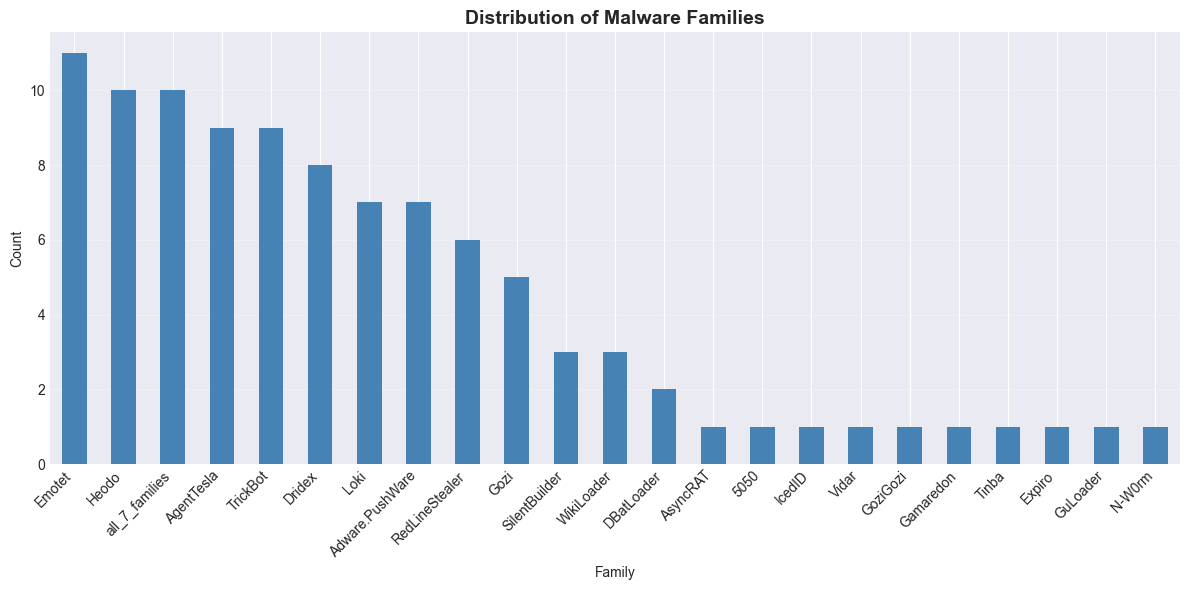


=== Family Distribution ===
Emotet: 11 (11.0%)
Heodo: 10 (10.0%)
all_7_families: 10 (10.0%)
AgentTesla: 9 (9.0%)
TrickBot: 9 (9.0%)
Dridex: 8 (8.0%)
Loki: 7 (7.0%)
Adware.PushWare: 7 (7.0%)
RedLineStealer: 6 (6.0%)
Gozi: 5 (5.0%)
SilentBuilder: 3 (3.0%)
WikiLoader: 3 (3.0%)
DBatLoader: 2 (2.0%)
AsyncRAT: 1 (1.0%)
5050: 1 (1.0%)
IcedID: 1 (1.0%)
Vidar: 1 (1.0%)
GoziGozi: 1 (1.0%)
Gamaredon: 1 (1.0%)
Tinba: 1 (1.0%)
Expiro: 1 (1.0%)
GuLoader: 1 (1.0%)
N-W0rm: 1 (1.0%)


In [4]:
if df is not None and 'family' in df.columns:
    plt.figure(figsize=(12, 6))
    family_counts = df['family'].value_counts()
    family_counts.plot(kind='bar', color='steelblue')
    plt.title('Distribution of Malware Families', fontsize=14, fontweight='bold')
    plt.xlabel('Family')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print('\n=== Family Distribution ===')
    for family, count in family_counts.items():
        pct = (count / len(df)) * 100
        print(f'{family}: {count} ({pct:.1f}%)')

## 2. Network Activity Analysis

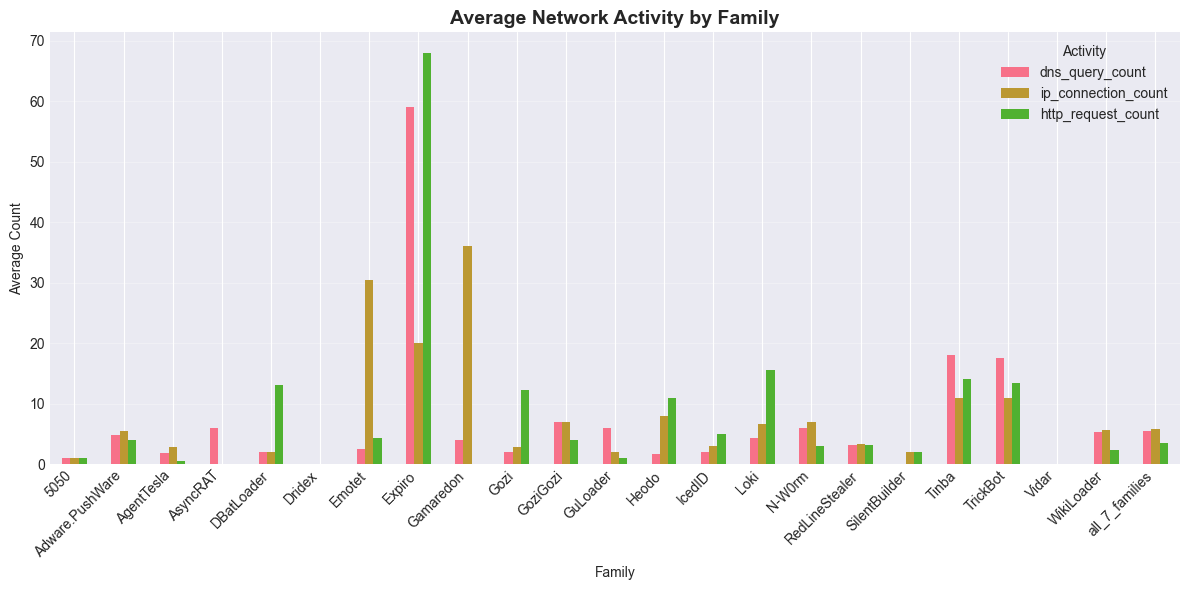

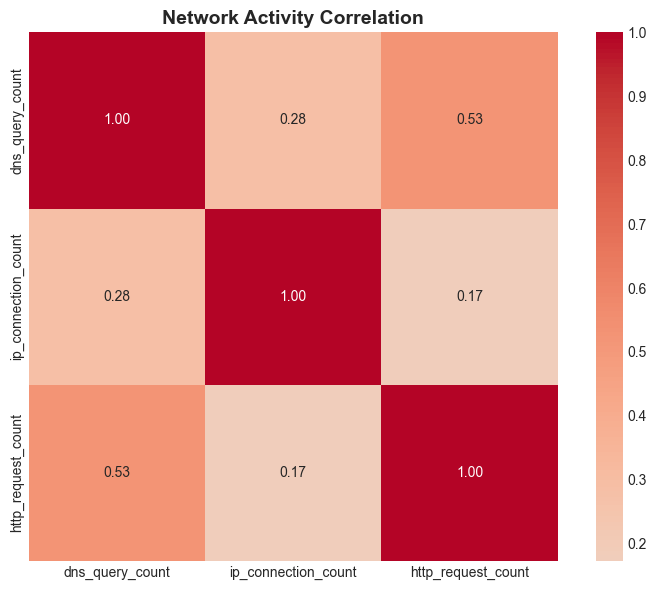

In [5]:
if df is not None:
    network_cols = ['dns_query_count', 'ip_connection_count', 'http_request_count']
    available_cols = [col for col in network_cols if col in df.columns]
    
    if available_cols and 'family' in df.columns:
        # Network by family
        plt.figure(figsize=(12, 6))
        network_data = df.groupby('family')[available_cols].mean()
        network_data.plot(kind='bar', ax=plt.gca())
        plt.title('Average Network Activity by Family', fontsize=14, fontweight='bold')
        plt.xlabel('Family')
        plt.ylabel('Average Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Activity')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        # Correlation
        if len(available_cols) > 1:
            plt.figure(figsize=(8, 6))
            corr = df[available_cols].corr()
            sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
            plt.title('Network Activity Correlation', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

## 3. Evasion & Advanced Techniques

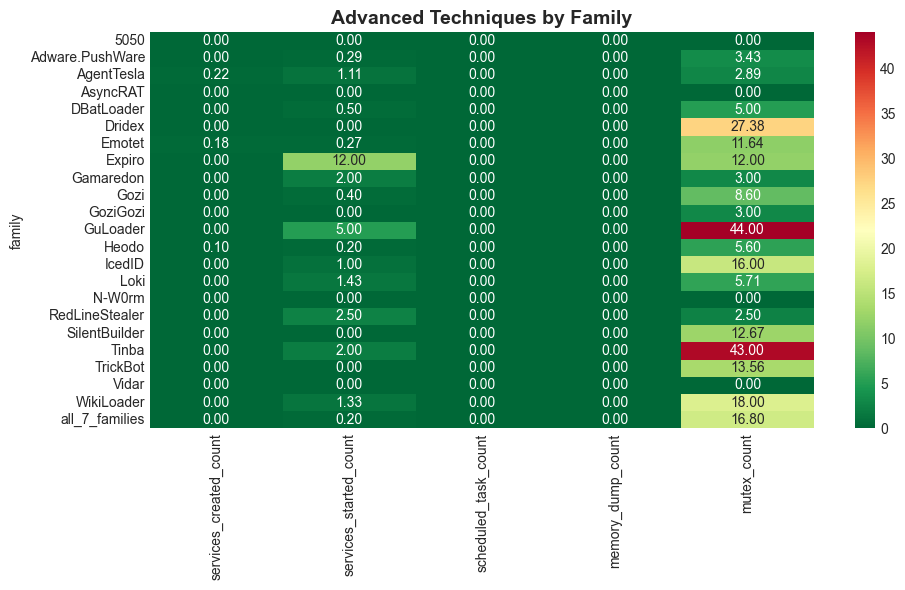

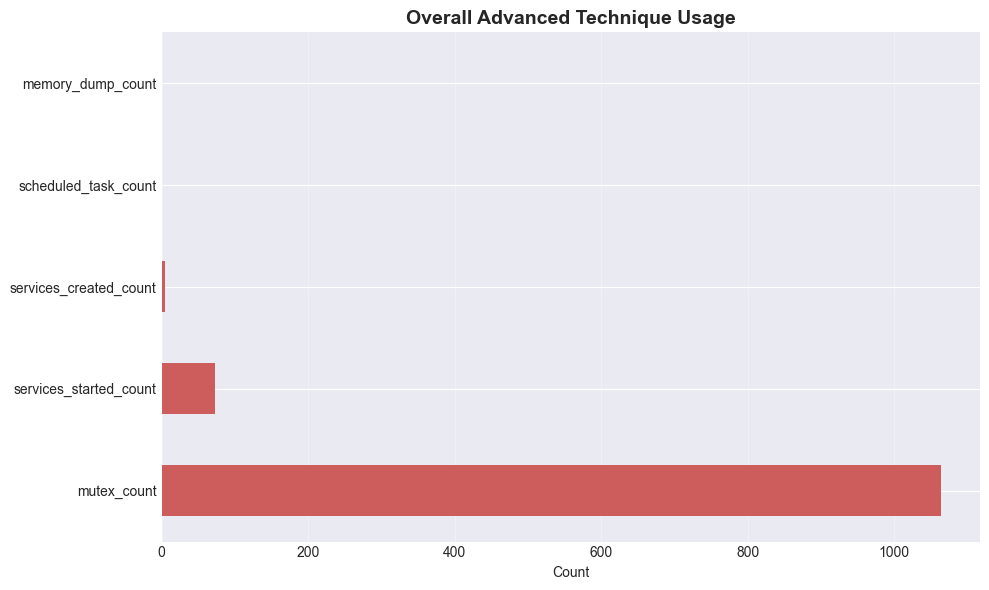


=== Advanced Techniques Statistics ===
services_created_count: 5 (5.0%)
services_started_count: 73 (73.0%)
scheduled_task_count: 0 (0.0%)
memory_dump_count: 0 (0.0%)
mutex_count: 1064 (1064.0%)


In [6]:
if df is not None and 'family' in df.columns:
    evasion_cols = ['services_created_count', 'services_started_count', 'scheduled_task_count', 'memory_dump_count', 'mutex_count']
    available_evasion = [col for col in evasion_cols if col in df.columns]
    
    if available_evasion:
        # Evasion by family
        plt.figure(figsize=(10, 6))
        evasion_data = df.groupby('family')[available_evasion].mean()
        sns.heatmap(evasion_data, annot=True, fmt='.2f', cmap='RdYlGn_r')
        plt.title('Advanced Techniques by Family', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Overall evasion
        plt.figure(figsize=(10, 6))
        evasion_totals = df[available_evasion].sum().sort_values(ascending=False)
        evasion_totals.plot(kind='barh', color='indianred')
        plt.title('Overall Advanced Technique Usage', fontsize=14, fontweight='bold')
        plt.xlabel('Count')
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
        print('\n=== Advanced Techniques Statistics ===')
        for col in available_evasion:
            count = df[col].sum()
            pct = (count / len(df)) * 100
            print(f'{col}: {count} ({pct:.1f}%)')

## 4. Source Distribution

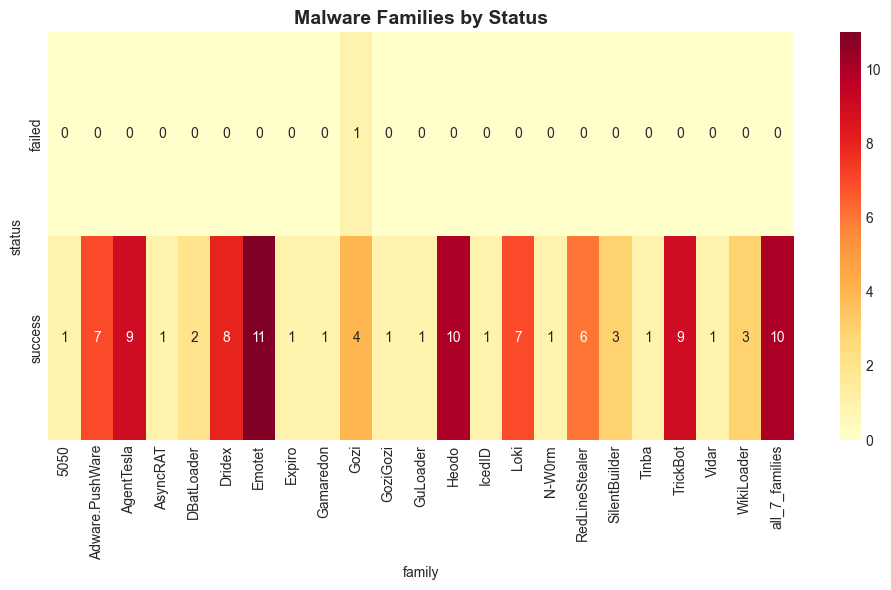


=== Status Distribution ===
success: 99 (99.0%)
failed: 1 (1.0%)


In [7]:
if df is not None and 'status' in df.columns and 'family' in df.columns:
    # Status-family heatmap
    plt.figure(figsize=(10, 6))
    status_family = pd.crosstab(df['status'], df['family'])
    sns.heatmap(status_family, cmap='YlOrRd', annot=True, fmt='g')
    plt.title('Malware Families by Status', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Top statuses
    print('\n=== Status Distribution ===')
    status_counts = df['status'].value_counts()
    for status, count in status_counts.items():
        pct = (count / len(df)) * 100
        print(f'{status}: {count} ({pct:.1f}%)')

## 5. Behavioral Activity

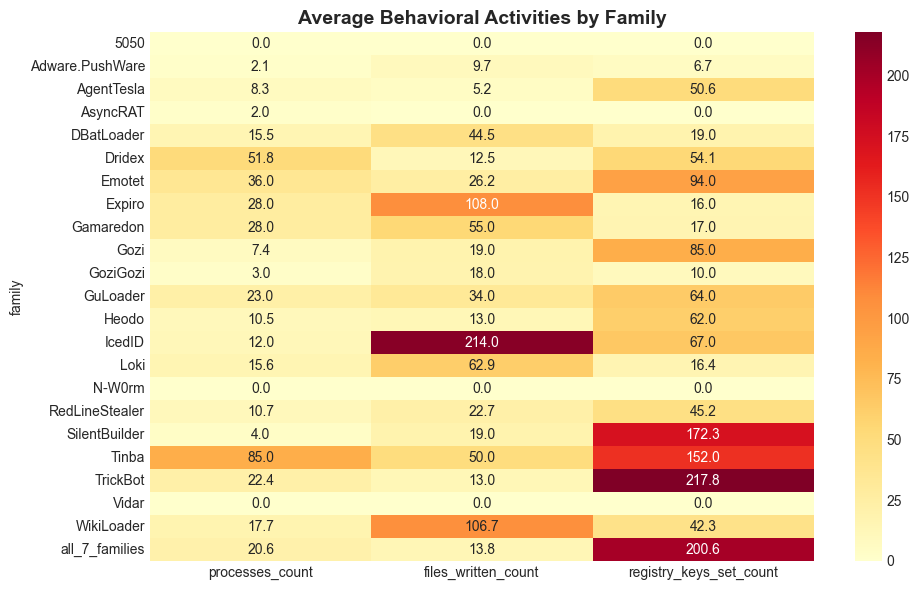


=== Behavior Stats ===
                 processes_count  files_written_count  registry_keys_set_count
family                                                                        
5050                        0.00                 0.00                     0.00
Adware.PushWare             2.14                 9.71                     6.71
AgentTesla                  8.33                 5.22                    50.56
AsyncRAT                    2.00                 0.00                     0.00
DBatLoader                 15.50                44.50                    19.00
Dridex                     51.75                12.50                    54.12
Emotet                     36.00                26.18                    94.00
Expiro                     28.00               108.00                    16.00
Gamaredon                  28.00                55.00                    17.00
Gozi                        7.40                19.00                    85.00
GoziGozi                    

In [8]:
if df is not None and 'family' in df.columns:
    behavior_cols = ['processes_count', 'files_written_count', 'registry_keys_set_count']
    available_behavior = [col for col in behavior_cols if col in df.columns]
    
    if available_behavior:
        # Behavioral heatmap
        plt.figure(figsize=(10, 6))
        behavior_data = df.groupby('family')[available_behavior].mean()
        sns.heatmap(behavior_data, annot=True, fmt='.1f', cmap='YlOrRd')
        plt.title('Average Behavioral Activities by Family', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print('\n=== Behavior Stats ===')
        print(behavior_data.round(2))

## 6. Family vs MITRE Techniques

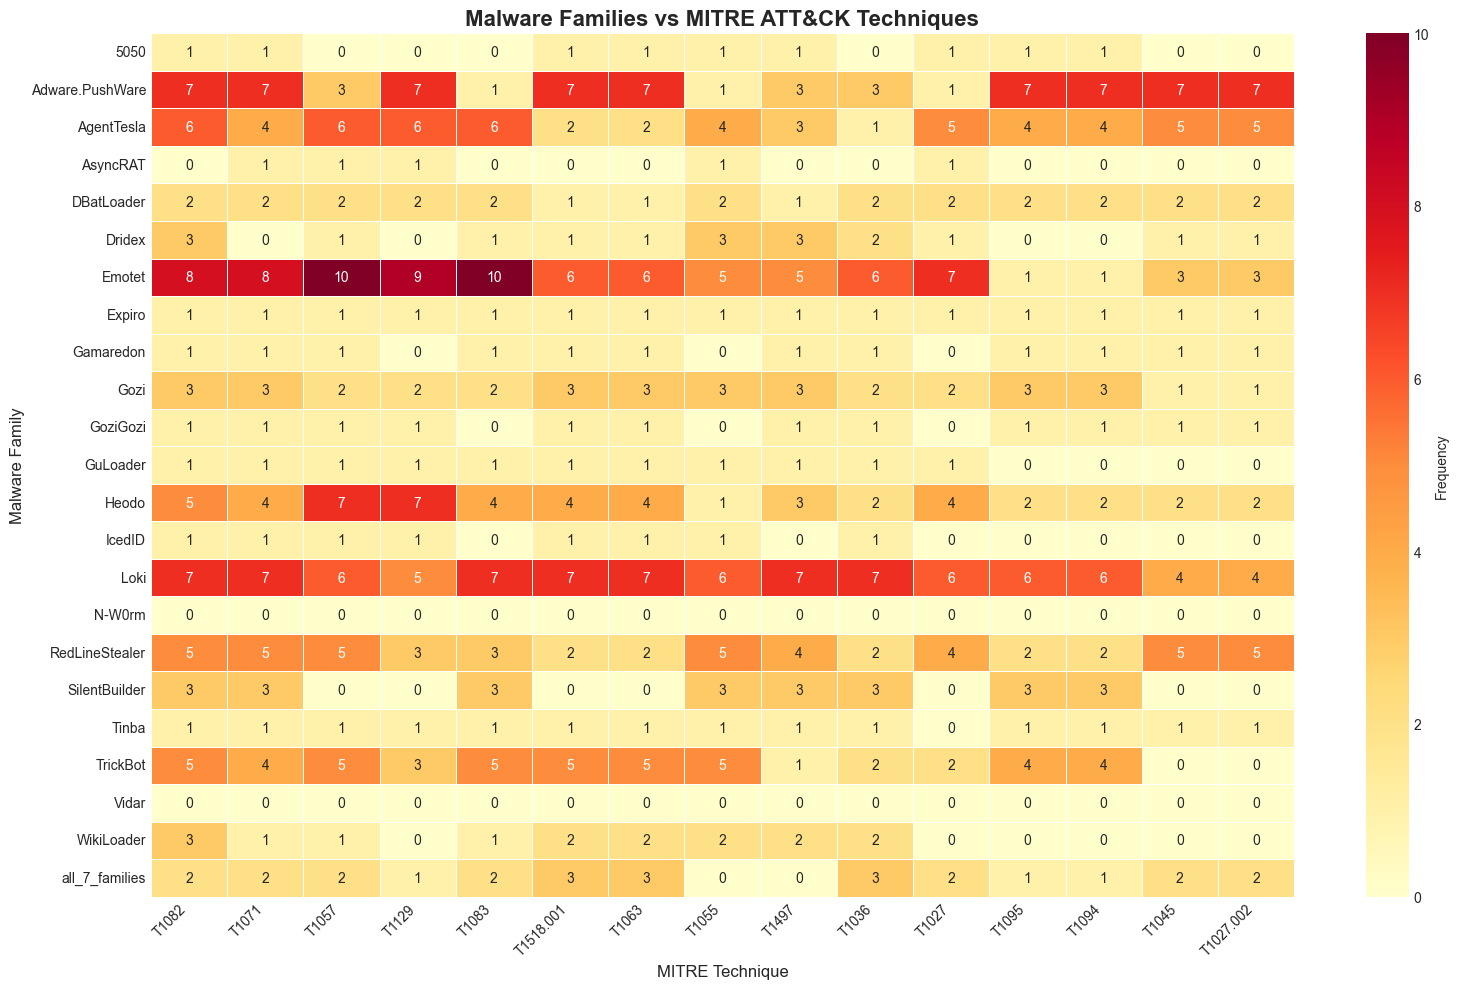


=== Family vs MITRE Techniques ===
Total unique families: 23
Total unique techniques: 154
Total technique occurrences: 889

Top Techniques:
  T1082: 66 occurrences
  T1071: 58 occurrences
  T1057: 57 occurrences
  T1129: 51 occurrences
  T1083: 51 occurrences
  T1518.001: 50 occurrences
  T1063: 50 occurrences
  T1055: 46 occurrences
  T1497: 44 occurrences
  T1036: 43 occurrences


In [9]:
if df is not None and 'mitre_list' in df.columns and 'family' in df.columns:
    # Build a mapping of families to MITRE techniques
    family_mitre_matrix = {}
    
    for _, row in df.iterrows():
        family = row['family']
        techniques = row['mitre_list']
        
        if family not in family_mitre_matrix:
            family_mitre_matrix[family] = Counter()
        
        family_mitre_matrix[family].update(techniques)
    
    # Check if we have any MITRE data
    total_techniques = sum(len(techs) for techs in family_mitre_matrix.values())
    
    if total_techniques > 0:
        # Get top MITRE techniques across all families
        all_techs_counter = Counter()
        for techs in family_mitre_matrix.values():
            all_techs_counter.update(techs)
        
        top_techniques = [tech for tech, _ in all_techs_counter.most_common(15)]
        
        # Create matrix for heatmap
        matrix_data = pd.DataFrame(0, 
                                   index=sorted(family_mitre_matrix.keys()),
                                   columns=top_techniques)
        
        for family, techs in family_mitre_matrix.items():
            for tech in top_techniques:
                if tech in techs:
                    matrix_data.loc[family, tech] = techs[tech]
        
        # Plot heatmap
        plt.figure(figsize=(16, 10))
        sns.heatmap(matrix_data, annot=True, fmt='g', cmap='YlOrRd', 
                    cbar_kws={'label': 'Frequency'}, linewidths=0.5)
        plt.title('Malware Families vs MITRE ATT&CK Techniques', fontsize=16, fontweight='bold')
        plt.xlabel('MITRE Technique', fontsize=12)
        plt.ylabel('Malware Family', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print('\n=== Family vs MITRE Techniques ===')
        print(f'Total unique families: {len(family_mitre_matrix)}')
        print(f'Total unique techniques: {len(all_techs_counter)}')
        print(f'Total technique occurrences: {total_techniques}')
        print('\nTop Techniques:')
        for tech, count in all_techs_counter.most_common(10):
            print(f'  {tech}: {count} occurrences')
    else:
        print('No MITRE technique data available - mitre_techniques column is empty')

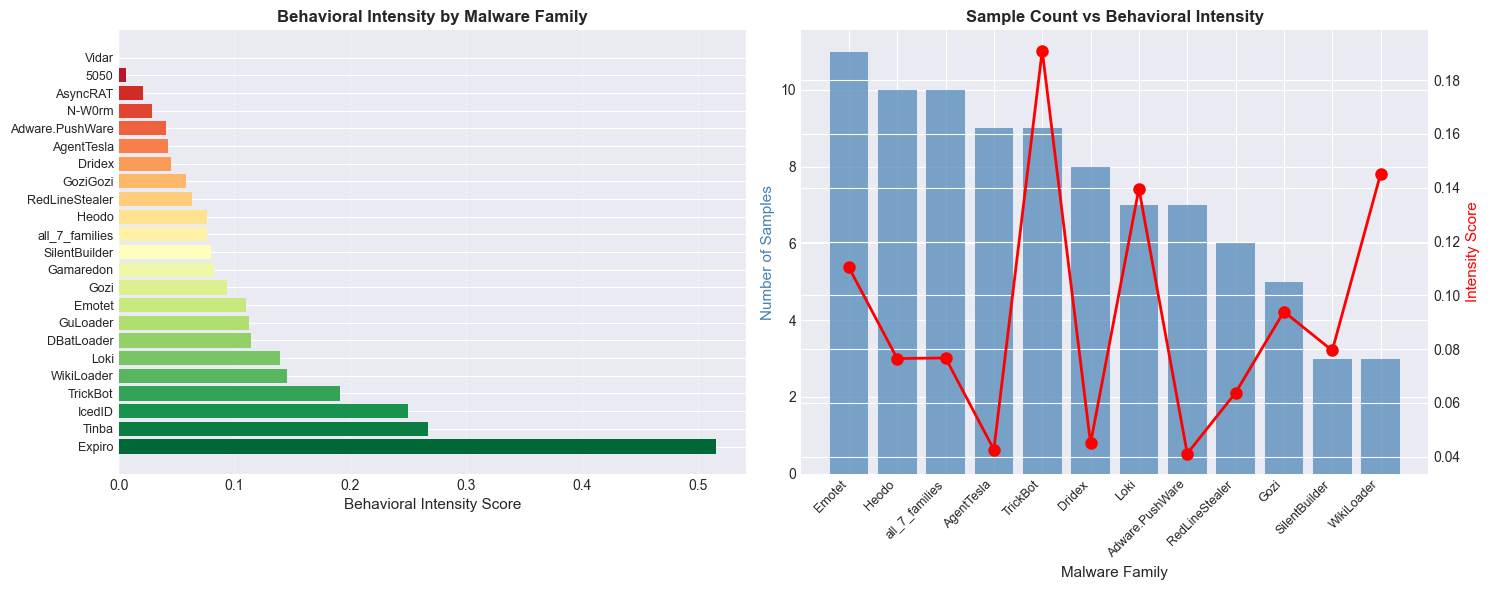


=== Top 10 Most Intense Families ===
family
Expiro        0.516
Tinba         0.267
IcedID        0.250
TrickBot      0.191
WikiLoader    0.145
Loki          0.140
DBatLoader    0.115
GuLoader      0.113
Emotet        0.110
Gozi          0.094
Name: intensity_score, dtype: float64


In [10]:
# 7. Family Analysis by Status and Behavior Intensity
# Create visualization of malware families ranked by behavioral intensity
if df is not None and 'family' in df.columns:
    # Calculate behavioral intensity score
    intensity_cols = ['process_count', 'http_request_count', 'dns_query_count', 'files_written_count', 'registry_written_count']
    available_intensity = [col for col in intensity_cols if col in df.columns]
    
    if available_intensity:
        # Create intensity score (normalized sum)
        df['intensity_score'] = 0
        for col in available_intensity:
            df['intensity_score'] += (df[col] - df[col].min()) / (df[col].max() - df[col].min() + 1)
        df['intensity_score'] = df['intensity_score'] / len(available_intensity)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Left plot: Average intensity by family
        family_intensity = df.groupby('family')['intensity_score'].mean().sort_values(ascending=False)
        colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(family_intensity)))
        axes[0].barh(range(len(family_intensity)), family_intensity.values, color=colors)
        axes[0].set_yticks(range(len(family_intensity)))
        axes[0].set_yticklabels(family_intensity.index, fontsize=9)
        axes[0].set_xlabel('Behavioral Intensity Score', fontsize=11)
        axes[0].set_title('Behavioral Intensity by Malware Family', fontsize=12, fontweight='bold')
        axes[0].grid(axis='x', alpha=0.3)
        
        # Right plot: Sample count and intensity by family
        family_counts = df['family'].value_counts().head(12)
        family_avg_intensity = df.groupby('family')['intensity_score'].mean()[family_counts.index]
        
        x = range(len(family_counts))
        ax2 = axes[1]
        bars = ax2.bar(x, family_counts.values, alpha=0.7, label='Sample Count', color='steelblue')
        ax3 = ax2.twinx()
        line = ax3.plot(x, family_avg_intensity.values, 'ro-', linewidth=2, markersize=8, label='Avg Intensity')
        
        ax2.set_xlabel('Malware Family', fontsize=11)
        ax2.set_ylabel('Number of Samples', fontsize=11, color='steelblue')
        ax3.set_ylabel('Intensity Score', fontsize=11, color='red')
        ax2.set_xticks(x)
        ax2.set_xticklabels(family_counts.index, rotation=45, ha='right', fontsize=9)
        ax2.set_title('Sample Count vs Behavioral Intensity', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\n=== Top 10 Most Intense Families ===")
        print(family_intensity.head(10).round(3))

/var/folders/1g/jbw_w_k56sn2h2t6h74q6mlw0000gn/T/ipykernel_8152/788530429.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


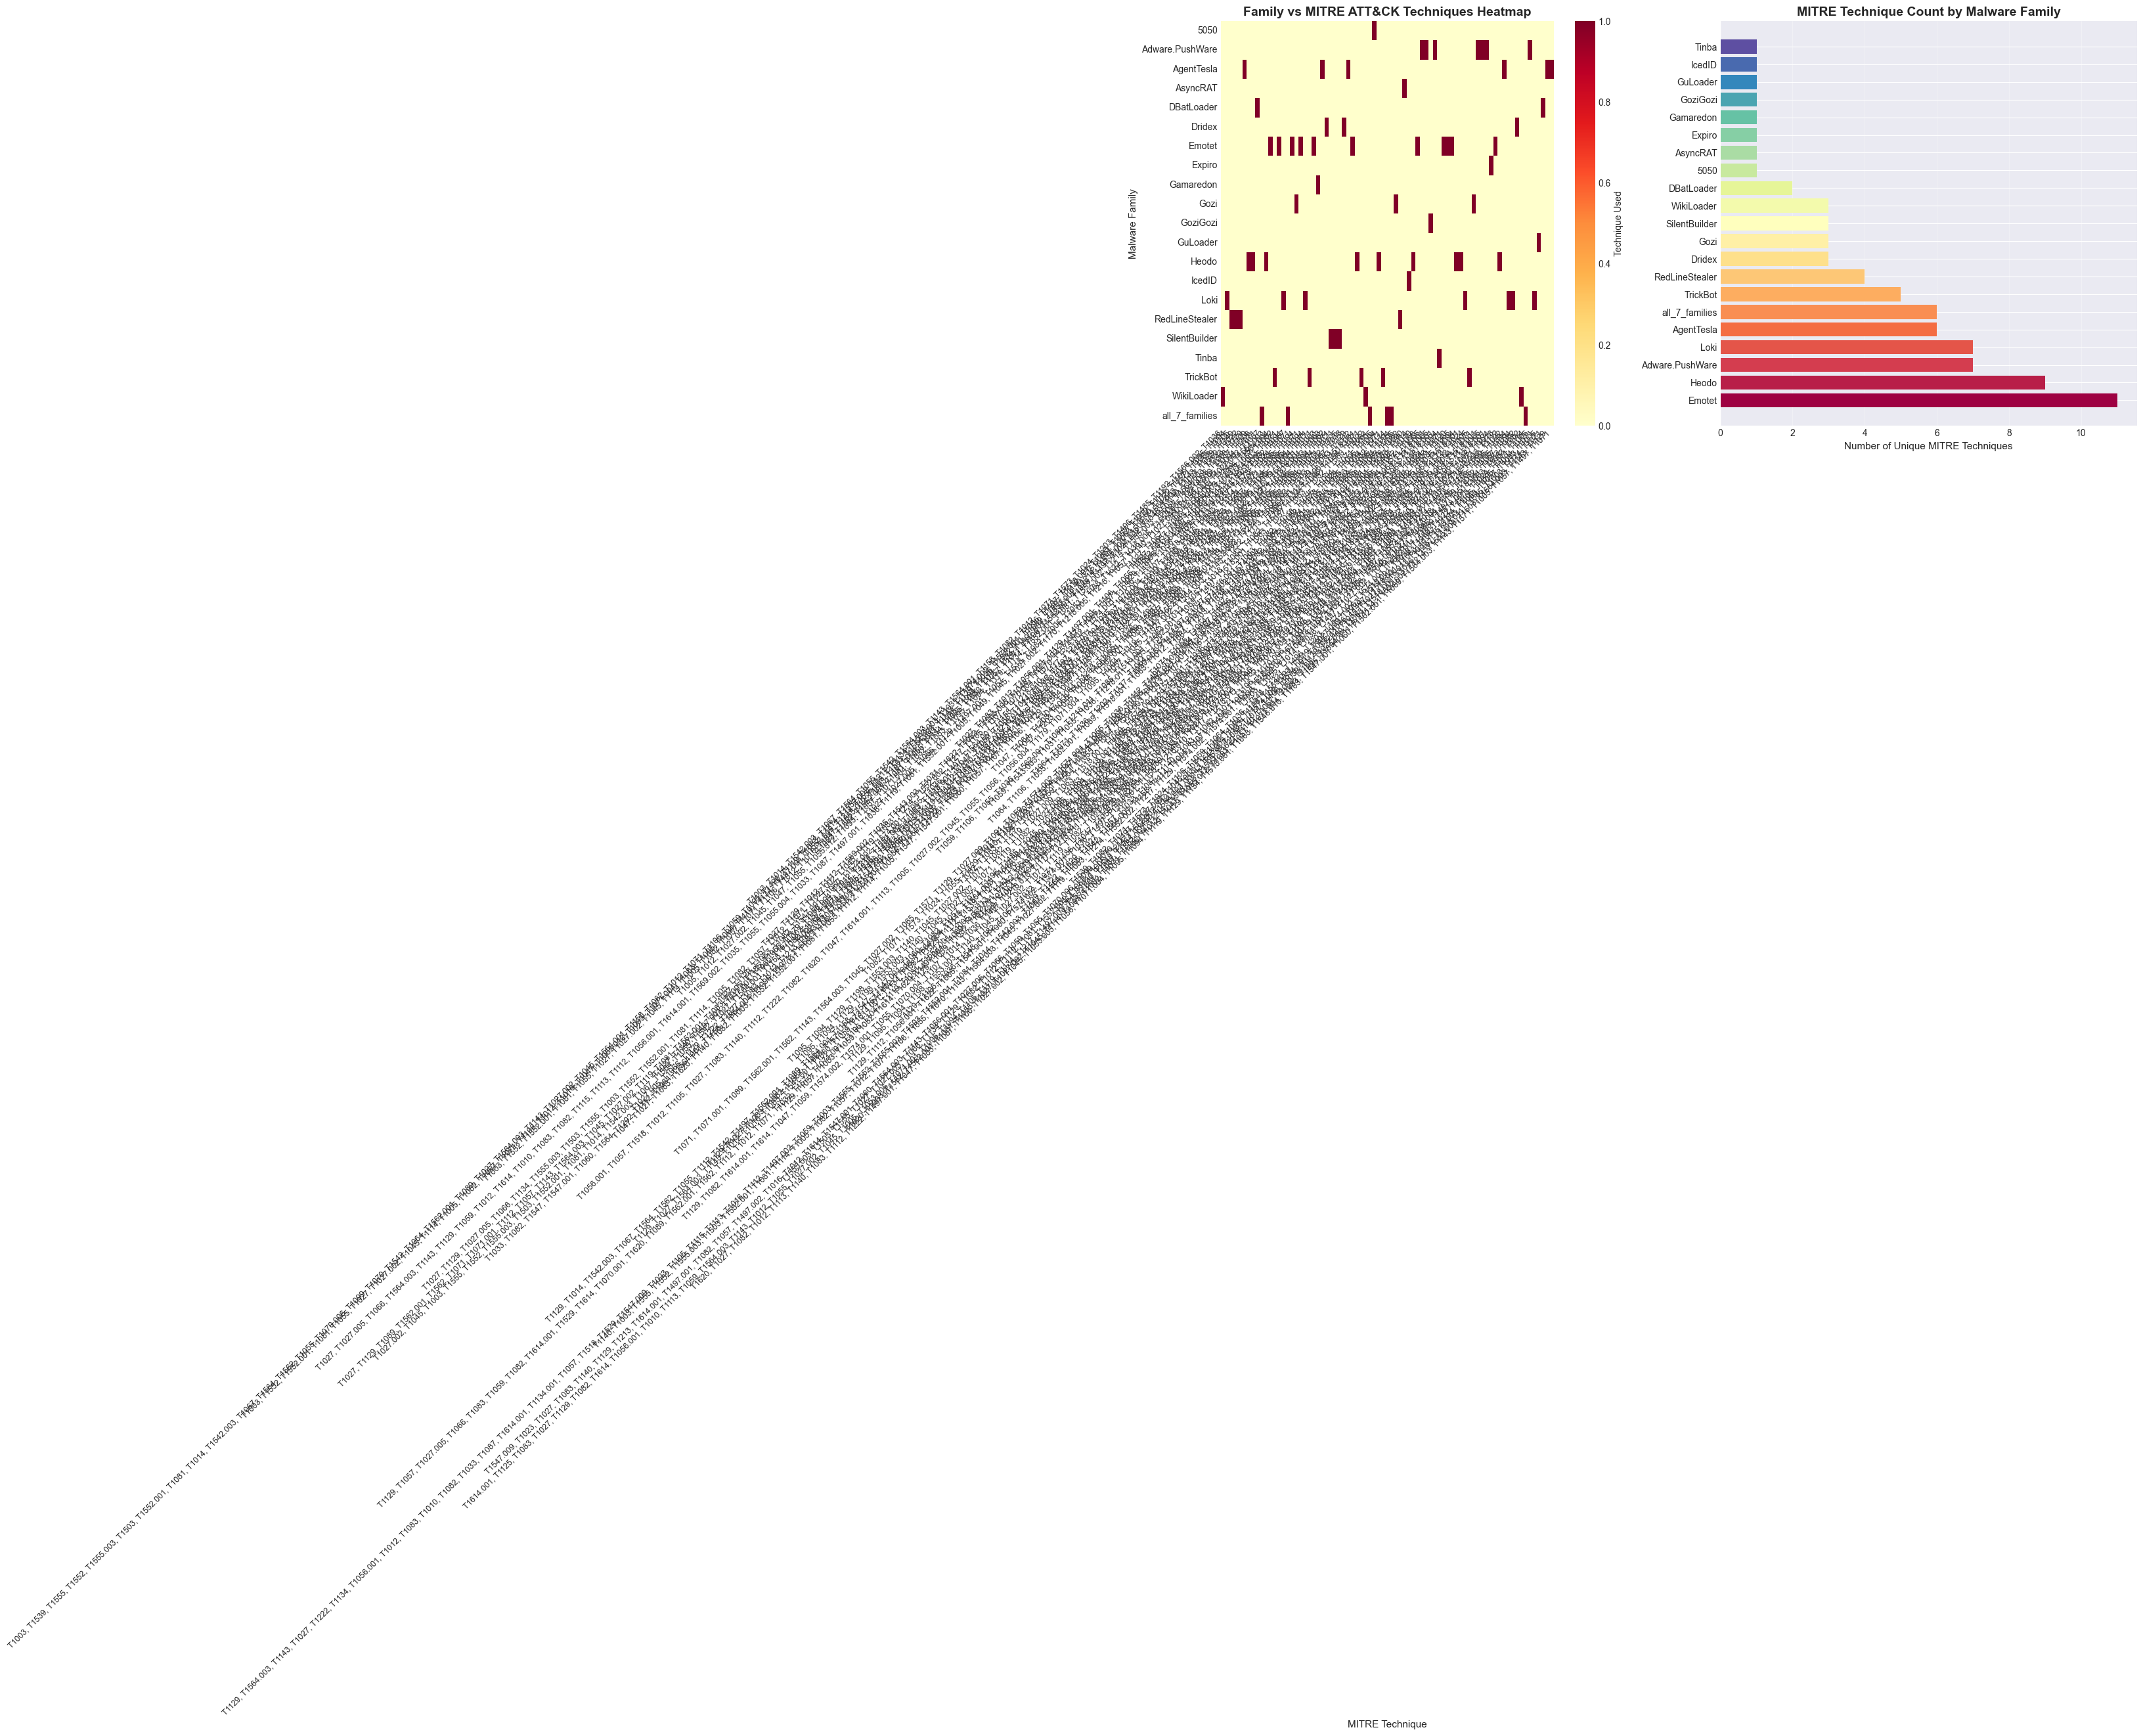


=== MITRE Techniques Summary ===
Emotet               → 11 techniques: T1129, T1112, T1056.001, T1622, T1005, T1547.001, T1060, T1574.002, T1574.001, T1036, T1497, T1564.001, T1158, T1218.010, T1117, T1218.011, T1085, T1070.004, T1107, T1518.001, T1063, T1057, T1083, T1082, T1573, T1024, T1071, T1018, T1027, T1140, T1497.001, T1547.001, T1060, T1574.002, T1574.001, T1055, T1036, T1497, T1564.001, T1158, T1218.010, T1117, T1218.011, T1085, T1070.004, T1107, T1518.001, T1063, T1057, T1083, T1082, T1573, T1024, T1571, T1065, T1071, T1129, T1027, T1564.003, T1143, T1012, T1016, T1083, T1547.001, T1060, T1059, T1614.001, T1134, T1082, T1529, T1112, T1539, T1071, T1198, T1553.003, T1140, T1045, T1027.002, T1057, T1091, T1574.002, T1574.001, T1038, T1036, T1562.001, T1089, T1070.004, T1107, T1056, T1518.001, T1063, T1120, T1083, T1614, T1129, T1055, T1218.011, T1085, T1082, T1056, T1129, T1027.005, T1066, T1222, T1083, T1564, T1564.004, T1096, T1071, T1071.001, T1057, T1564.003, T1143, T1053

In [11]:
## 8. Family vs MITRE ATT&CK Techniques
# Visualize which malware families use which MITRE techniques
if df is not None and 'mitre_techniques' in df.columns and 'family' in df.columns:
    # Parse MITRE techniques (separated by ||)
    def parse_techniques(tech_str):
        if pd.isna(tech_str) or tech_str == '':
            return []
        return [t.strip() for t in str(tech_str).split('||')]
    
    # Create family-technique mapping
    family_tech_map = {}
    for idx, row in df.iterrows():
        family = row['family']
        techniques = parse_techniques(row['mitre_techniques'])
        if techniques and techniques != ['']:
            if family not in family_tech_map:
                family_tech_map[family] = []
            family_tech_map[family].extend(techniques)
    
    # Get unique techniques per family
    family_tech_unique = {}
    for family, techs in family_tech_map.items():
        family_tech_unique[family] = list(set(techs))
    
    # Create heatmap data
    all_techniques = sorted(set([t for techs in family_tech_unique.values() for t in techs]))
    families = sorted(family_tech_unique.keys())
    
    heatmap_data = np.zeros((len(families), len(all_techniques)))
    for i, family in enumerate(families):
        for j, tech in enumerate(all_techniques):
            if tech in family_tech_unique[family]:
                heatmap_data[i, j] = 1
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Heatmap
    sns.heatmap(heatmap_data, xticklabels=all_techniques, yticklabels=families, 
                cmap='YlOrRd', cbar_kws={'label': 'Technique Used'}, ax=ax1)
    ax1.set_title('Family vs MITRE ATT&CK Techniques Heatmap', fontsize=14, fontweight='bold')
    ax1.set_xlabel('MITRE Technique', fontsize=11)
    ax1.set_ylabel('Malware Family', fontsize=11)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=9)
    
    # Count techniques per family (bar chart)
    tech_counts = [(family, len(family_tech_unique[family])) for family in families]
    tech_counts.sort(key=lambda x: x[1], reverse=True)
    families_sorted = [x[0] for x in tech_counts]
    counts_sorted = [x[1] for x in tech_counts]
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(families_sorted)))
    ax2.barh(range(len(families_sorted)), counts_sorted, color=colors)
    ax2.set_yticks(range(len(families_sorted)))
    ax2.set_yticklabels(families_sorted, fontsize=10)
    ax2.set_xlabel('Number of Unique MITRE Techniques', fontsize=11)
    ax2.set_title('MITRE Technique Count by Malware Family', fontsize=14, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n=== MITRE Techniques Summary ===")
    for family, techs in sorted(family_tech_unique.items(), key=lambda x: len(x[1]), reverse=True)[:10]:
        print(f"{family:20} → {len(techs)} techniques: {', '.join(techs[:5])}{'...' if len(techs) > 5 else ''}")

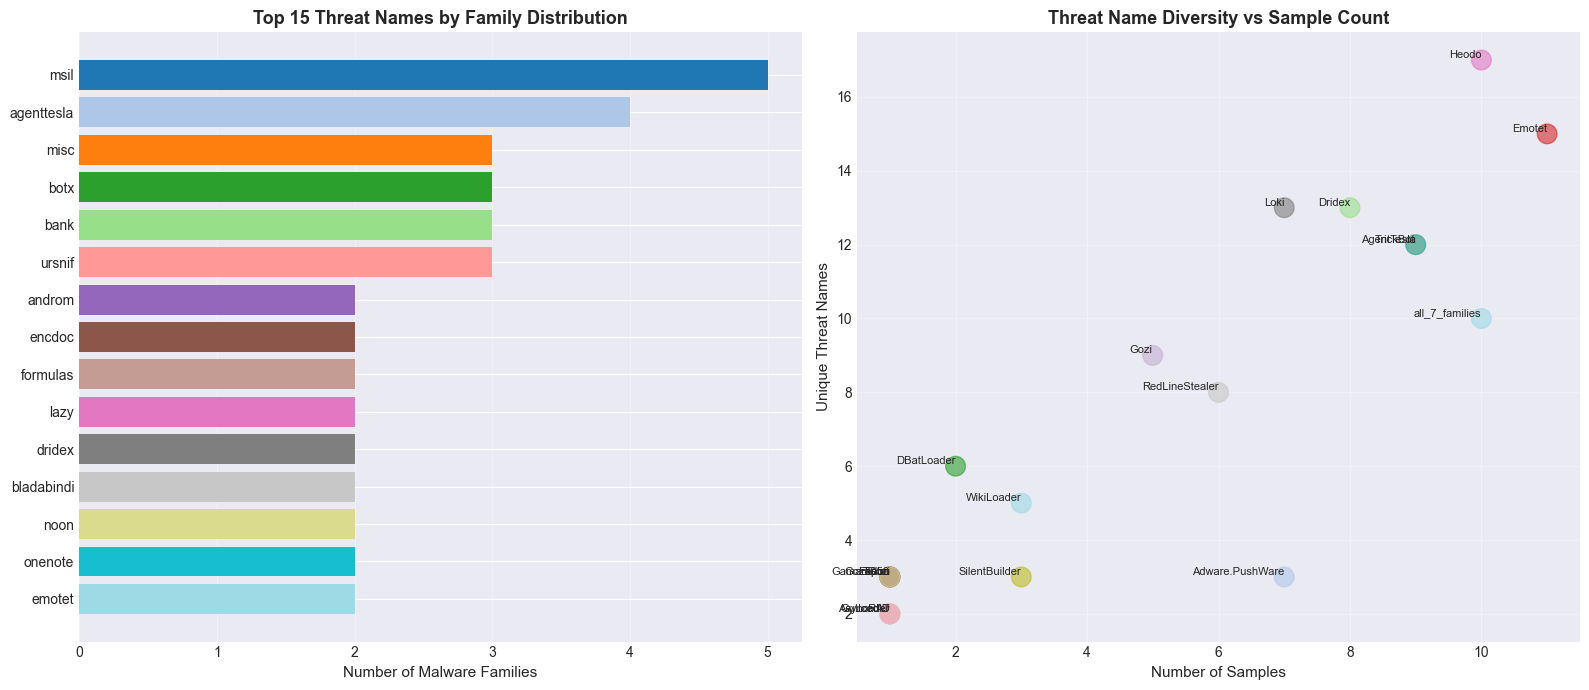


=== Threat Names Summary ===
Total unique threat names: 115

Top threat names:
  msil                           → Found in 5 families
  agenttesla                     → Found in 4 families
  misc                           → Found in 3 families
  botx                           → Found in 3 families
  bank                           → Found in 3 families
  ursnif                         → Found in 3 families
  androm                         → Found in 2 families
  encdoc                         → Found in 2 families
  formulas                       → Found in 2 families
  lazy                           → Found in 2 families


In [12]:
## 9. Family vs Threat Names Distribution
# Visualize which threat names are associated with each malware family
if df is not None and 'threat_names' in df.columns and 'family' in df.columns:
    # Parse threat names (separated by ||)
    def parse_threat_names(threat_str):
        if pd.isna(threat_str) or threat_str == '':
            return []
        return [t.strip() for t in str(threat_str).split('||')]
    
    # Create family-threat mapping
    family_threat_map = {}
    for idx, row in df.iterrows():
        family = row['family']
        threats = parse_threat_names(row['threat_names'])
        if threats and threats != ['']:
            if family not in family_threat_map:
                family_threat_map[family] = []
            family_threat_map[family].extend(threats)
    
    # Get unique threats per family and count
    family_threat_unique = {}
    threat_family_count = {}
    for family, threats in family_threat_map.items():
        unique_threats = list(set(threats))
        family_threat_unique[family] = unique_threats
        for threat in unique_threats:
            if threat not in threat_family_count:
                threat_family_count[threat] = 0
            threat_family_count[threat] += 1
    
    # Sort threats by frequency
    top_threats = sorted(threat_family_count.items(), key=lambda x: x[1], reverse=True)[:15]
    threat_names_list = [t[0] for t in top_threats]
    threat_counts = [t[1] for t in top_threats]
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Left: Top threat names by family count
    colors = plt.cm.tab20(np.linspace(0, 1, len(threat_names_list)))
    ax1.barh(range(len(threat_names_list)), threat_counts, color=colors)
    ax1.set_yticks(range(len(threat_names_list)))
    ax1.set_yticklabels(threat_names_list, fontsize=10)
    ax1.set_xlabel('Number of Malware Families', fontsize=11)
    ax1.set_title('Top 15 Threat Names by Family Distribution', fontsize=13, fontweight='bold')
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
    
    # Right: Threats per family (scatter)
    families = sorted(family_threat_unique.keys())
    threat_counts_per_family = [len(family_threat_unique[f]) for f in families]
    samples_per_family = [df[df['family'] == f].shape[0] for f in families]
    
    scatter = ax2.scatter(samples_per_family, threat_counts_per_family, 
                         s=200, alpha=0.6, c=range(len(families)), cmap='tab20')
    
    # Label each point
    for i, family in enumerate(families):
        ax2.annotate(family, (samples_per_family[i], threat_counts_per_family[i]), 
                    fontsize=8, ha='right', va='bottom')
    
    ax2.set_xlabel('Number of Samples', fontsize=11)
    ax2.set_ylabel('Unique Threat Names', fontsize=11)
    ax2.set_title('Threat Name Diversity vs Sample Count', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n=== Threat Names Summary ===")
    print(f"Total unique threat names: {len(threat_family_count)}")
    print("\nTop threat names:")
    for threat, count in top_threats[:10]:
        print(f"  {threat:30} → Found in {count} families")

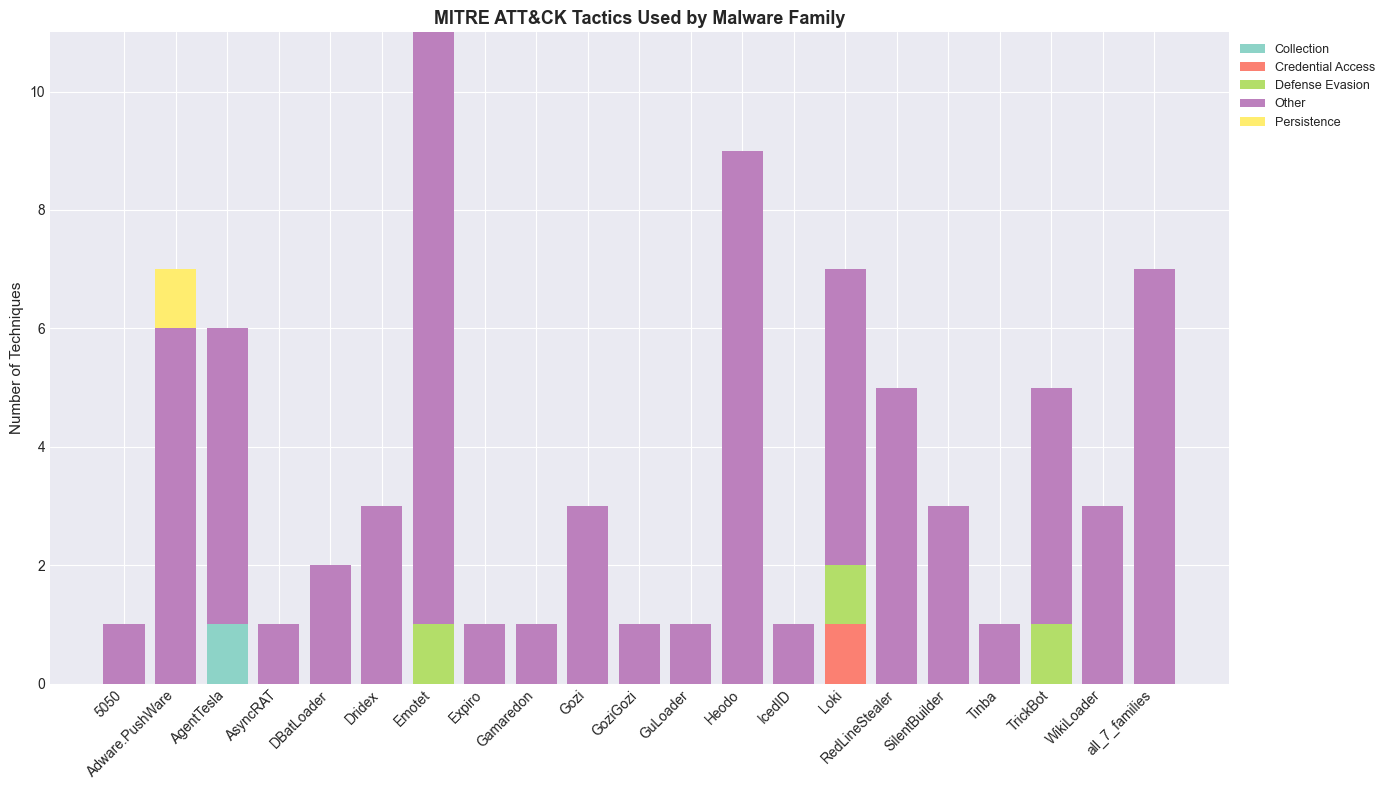


=== Tactic Distribution Summary ===
5050                 → 1 tactics used
Adware.PushWare      → 2 tactics used
AgentTesla           → 2 tactics used
AsyncRAT             → 1 tactics used
DBatLoader           → 1 tactics used
Dridex               → 1 tactics used
Emotet               → 2 tactics used
Expiro               → 1 tactics used


In [13]:
## 10. MITRE Technique Categories by Family
# Categorize techniques into ATT&CK tactics and show distribution
if df is not None and 'mitre_techniques' in df.columns:
    # MITRE ATT&CK Tactic mapping (sample - covers common techniques)
    tactic_map = {
        # Initial Access
        'T1566': 'Initial Access', 'T1566.001': 'Initial Access',
        # Execution
        'T1059': 'Execution', 'T1106': 'Execution', 'T1053': 'Execution', 'T1053.005': 'Execution',
        'T1129': 'Execution', 'T1204': 'Execution',
        # Persistence
        'T1547': 'Persistence', 'T1547.001': 'Persistence', 'T1543': 'Persistence', 'T1543.003': 'Persistence',
        'T1547.011': 'Persistence', 'T1547.013': 'Persistence', 'T1547.014': 'Persistence',
        # Privilege Escalation
        'T1548': 'Privilege Escalation', 'T1134': 'Privilege Escalation',
        # Defense Evasion
        'T1548': 'Defense Evasion', 'T1140': 'Defense Evasion', 'T1027': 'Defense Evasion', 
        'T1562': 'Defense Evasion', 'T1036': 'Defense Evasion', 'T1564': 'Defense Evasion',
        'T1564.004': 'Defense Evasion', 'T1070': 'Defense Evasion', 'T1070.004': 'Defense Evasion',
        'T1036.005': 'Defense Evasion', 'T1112': 'Defense Evasion', 'T1222': 'Defense Evasion',
        # Credential Access
        'T1056': 'Credential Access', 'T1056.004': 'Credential Access', 'T1056.001': 'Credential Access',
        'T1555': 'Credential Access', 'T1187': 'Credential Access', 'T1056.002': 'Credential Access',
        # Discovery
        'T1087': 'Discovery', 'T1010': 'Discovery', 'T1217': 'Discovery', 'T1580': 'Discovery',
        'T1526': 'Discovery', 'T1622': 'Discovery', 'T1538': 'Discovery', 'T1526': 'Discovery',
        'T1087.004': 'Discovery', 'T1087.001': 'Discovery', 'T1087.002': 'Discovery',
        'T1538': 'Discovery', 'T1526': 'Discovery', 'T1123': 'Discovery', 'T1119': 'Discovery',
        'T1185': 'Discovery', 'T1040': 'Discovery', 'T1007': 'Discovery', 'T1010': 'Discovery',
        'T1580': 'Discovery', 'T1622': 'Discovery', 'T1012': 'Discovery', 'T1018': 'Discovery',
        # Collection
        'T1557': 'Collection', 'T1123': 'Collection', 'T1115': 'Collection', 'T1530': 'Collection',
        'T1056': 'Collection', 'T1056.004': 'Collection', 'T1123': 'Collection', 'T1185': 'Collection',
        'T1113': 'Collection', 'T1115': 'Collection', 'T1119': 'Collection',
        # Command & Control
        'T1071': 'Command & Control', 'T1071.001': 'Command & Control', 'T1571': 'Command & Control',
        'T1008': 'Command & Control', 'T1573': 'Command & Control', 'T1573.001': 'Command & Control',
        'T1008': 'Command & Control', 'T1571': 'Command & Control', 'T1008': 'Command & Control',
        # Exfiltration
        'T1020': 'Exfiltration', 'T1030': 'Exfiltration', 'T1048': 'Exfiltration', 'T1041': 'Exfiltration',
        'T1048.003': 'Exfiltration', 'T1567': 'Exfiltration', 'T1567.002': 'Exfiltration', 'T1567.001': 'Exfiltration',
        # Impact
        'T1531': 'Impact', 'T1485': 'Impact', 'T1561': 'Impact', 'T1491': 'Impact',
    }
    
    # Extract tactics from techniques
    family_tactics = {}
    for idx, row in df.iterrows():
        family = row['family']
        techs_str = row['mitre_techniques']
        if pd.notna(techs_str) and techs_str != '':
            techniques = [t.strip() for t in str(techs_str).split('||')]
            if family not in family_tactics:
                family_tactics[family] = {}
            
            for tech in techniques:
                # Get base technique (T1234 instead of T1234.001)
                base_tech = tech.split('.')[0]
                tactic = tactic_map.get(tech, tactic_map.get(base_tech, 'Other'))
                family_tactics[family][tactic] = family_tactics[family].get(tactic, 0) + 1
    
    # Create stacked bar chart
    families = sorted(family_tactics.keys())
    tactics = sorted(set([t for tactics in family_tactics.values() for t in tactics.keys()]))
    
    data_matrix = []
    for family in families:
        row = [family_tactics[family].get(tactic, 0) for tactic in tactics]
        data_matrix.append(row)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Stacked bar chart
    bottom = np.zeros(len(families))
    colors_tac = plt.cm.Set3(np.linspace(0, 1, len(tactics)))
    
    for i, tactic in enumerate(tactics):
        values = [data_matrix[j][i] for j in range(len(families))]
        ax.bar(range(len(families)), values, bottom=bottom, label=tactic, color=colors_tac[i])
        bottom += values
    
    ax.set_xticks(range(len(families)))
    ax.set_xticklabels(families, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Number of Techniques', fontsize=11)
    ax.set_title('MITRE ATT&CK Tactics Used by Malware Family', fontsize=13, fontweight='bold')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)
    plt.tight_layout()
    plt.show()
    
    print("\n=== Tactic Distribution Summary ===")
    for family in families[:8]:
        tactics_count = len(family_tactics[family])
        print(f"{family:20} → {tactics_count} tactics used")

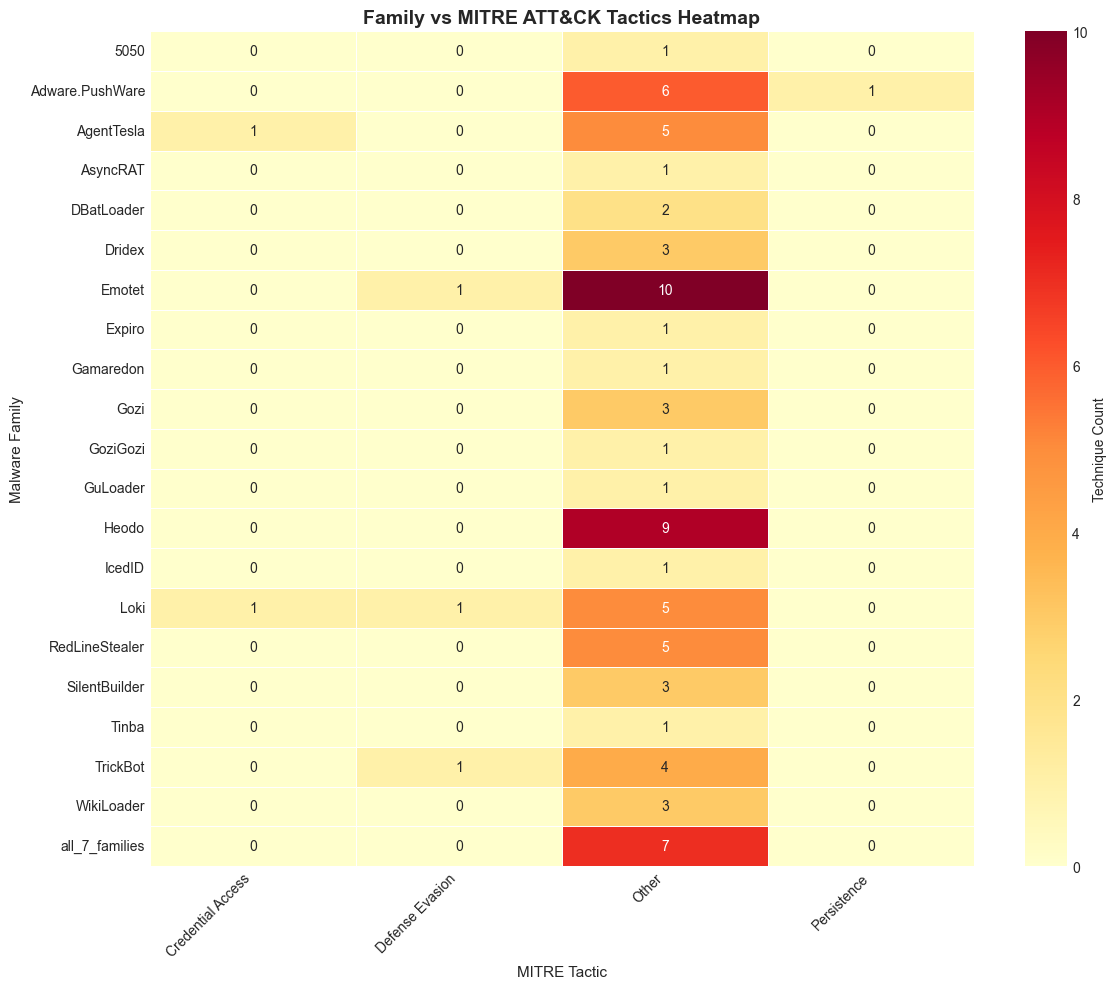


=== Family vs Tactic Summary ===
Total families: 21
Total tactics: 4

Tactic coverage by family (top 10):
  5050                 → 1 tactics, 1 total techniques
  Adware.PushWare      → 2 tactics, 7 total techniques
  AgentTesla           → 2 tactics, 6 total techniques
  AsyncRAT             → 1 tactics, 1 total techniques
  DBatLoader           → 1 tactics, 2 total techniques
  Dridex               → 1 tactics, 3 total techniques
  Emotet               → 2 tactics, 11 total techniques
  Expiro               → 1 tactics, 1 total techniques
  Gamaredon            → 1 tactics, 1 total techniques
  Gozi                 → 1 tactics, 3 total techniques
  GoziGozi             → 1 tactics, 1 total techniques
  GuLoader             → 1 tactics, 1 total techniques
  Heodo                → 1 tactics, 9 total techniques
  IcedID               → 1 tactics, 1 total techniques
  Loki                 → 3 tactics, 7 total techniques
  RedLineStealer       → 1 tactics, 5 total techniques
  SilentBuil

In [30]:
## 11. Family vs MITRE Tactics Heatmap
# Create a heatmap showing which tactics each family uses
if df is not None and 'mitre_techniques' in df.columns:
    # MITRE ATT&CK Tactic mapping
    tactic_map = {
        'T1566': 'Initial Access', 'T1566.001': 'Initial Access',
        'T1059': 'Execution', 'T1106': 'Execution', 'T1053': 'Execution', 'T1053.005': 'Execution',
        'T1129': 'Execution', 'T1204': 'Execution',
        'T1547': 'Persistence', 'T1547.001': 'Persistence', 'T1543': 'Persistence', 'T1543.003': 'Persistence',
        'T1547.011': 'Persistence', 'T1547.013': 'Persistence', 'T1547.014': 'Persistence',
        'T1548': 'Privilege Escalation', 'T1134': 'Privilege Escalation',
        'T1140': 'Defense Evasion', 'T1027': 'Defense Evasion', 
        'T1562': 'Defense Evasion', 'T1036': 'Defense Evasion', 'T1564': 'Defense Evasion',
        'T1564.004': 'Defense Evasion', 'T1070': 'Defense Evasion', 'T1070.004': 'Defense Evasion',
        'T1036.005': 'Defense Evasion', 'T1112': 'Defense Evasion', 'T1222': 'Defense Evasion',
        'T1056': 'Credential Access', 'T1056.004': 'Credential Access', 'T1056.001': 'Credential Access',
        'T1555': 'Credential Access', 'T1187': 'Credential Access', 'T1056.002': 'Credential Access',
        'T1087': 'Discovery', 'T1010': 'Discovery', 'T1217': 'Discovery', 'T1580': 'Discovery',
        'T1526': 'Discovery', 'T1622': 'Discovery', 'T1538': 'Discovery',
        'T1087.004': 'Discovery', 'T1087.001': 'Discovery', 'T1087.002': 'Discovery',
        'T1123': 'Discovery', 'T1119': 'Discovery',
        'T1185': 'Discovery', 'T1040': 'Discovery', 'T1007': 'Discovery',
        'T1012': 'Discovery', 'T1018': 'Discovery',
        'T1557': 'Collection', 'T1115': 'Collection', 'T1530': 'Collection',
        'T1113': 'Collection',
        'T1071': 'Command & Control', 'T1071.001': 'Command & Control', 'T1571': 'Command & Control',
        'T1008': 'Command & Control', 'T1573': 'Command & Control', 'T1573.001': 'Command & Control',
        'T1020': 'Exfiltration', 'T1030': 'Exfiltration', 'T1048': 'Exfiltration', 'T1041': 'Exfiltration',
        'T1048.003': 'Exfiltration', 'T1567': 'Exfiltration', 'T1567.002': 'Exfiltration', 'T1567.001': 'Exfiltration',
        'T1531': 'Impact', 'T1485': 'Impact', 'T1561': 'Impact', 'T1491': 'Impact',
    }
    
    # Build family-tactic matrix
    family_tactic_matrix = {}
    for idx, row in df.iterrows():
        family = row['family']
        techs_str = row['mitre_techniques']
        if pd.notna(techs_str) and techs_str != '':
            techniques = [t.strip() for t in str(techs_str).split('||')]
            if family not in family_tactic_matrix:
                family_tactic_matrix[family] = {}
            
            for tech in techniques:
                base_tech = tech.split('.')[0]
                tactic = tactic_map.get(tech, tactic_map.get(base_tech, 'Other'))
                if tactic not in family_tactic_matrix[family]:
                    family_tactic_matrix[family][tactic] = 0
                family_tactic_matrix[family][tactic] += 1
    
    # Create heatmap dataframe
    families_list = sorted(family_tactic_matrix.keys())
    all_tactics = sorted(set([t for tactics_dict in family_tactic_matrix.values() for t in tactics_dict.keys()]))
    
    heatmap_df = pd.DataFrame(0, index=families_list, columns=all_tactics)
    for family, tactics_dict in family_tactic_matrix.items():
        for tactic, count in tactics_dict.items():
            heatmap_df.loc[family, tactic] = count
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Technique Count'}, linewidths=0.5)
    plt.title('Family vs MITRE ATT&CK Tactics Heatmap', fontsize=14, fontweight='bold')
    plt.xlabel('MITRE Tactic', fontsize=11)
    plt.ylabel('Malware Family', fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    print("\n=== Family vs Tactic Summary ===")
    print(f"Total families: {len(families_list)}")
    print(f"Total tactics: {len(all_tactics)}")
    print("\nTactic coverage by family (top 10):")
    for family in families_list:
        tactics_used = len(family_tactic_matrix[family])
        total_techniques = sum(family_tactic_matrix[family].values())
        print(f"  {family:20} → {tactics_used} tactics, {total_techniques} total techniques")

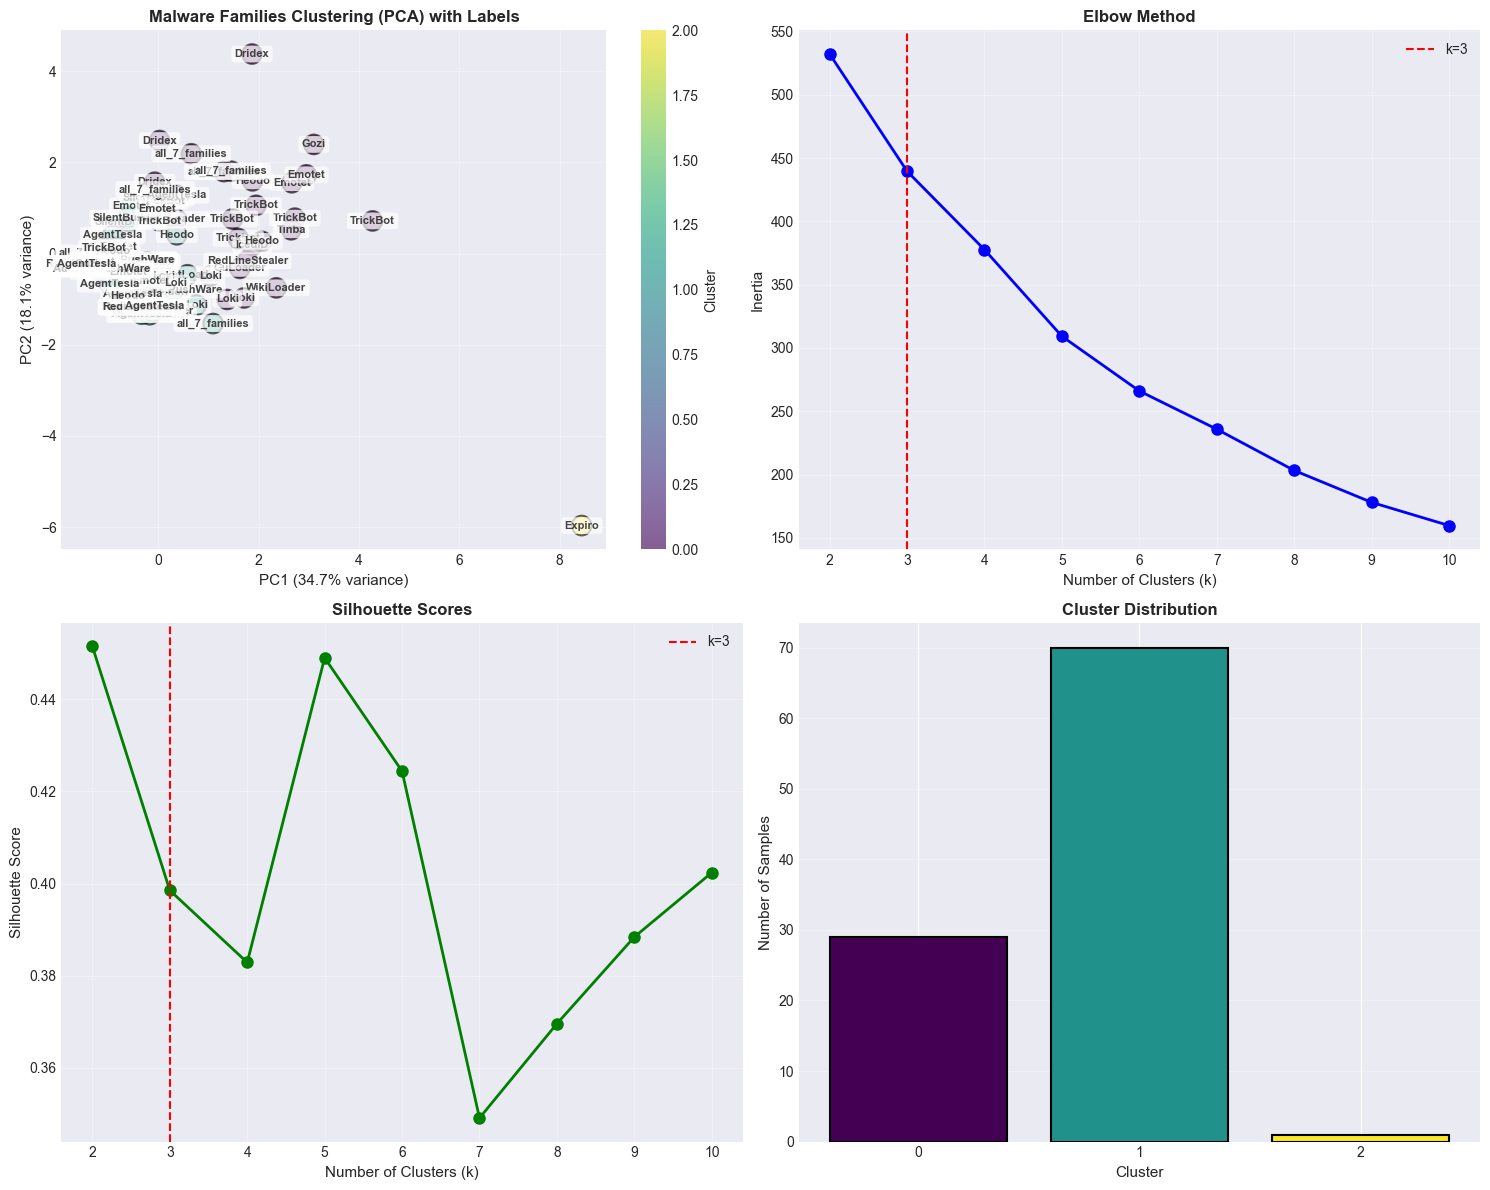


=== Clustering Summary ===
Optimal k: 3
Silhouette Score: 0.3985
PCA Variance Explained: 52.8%

Cluster breakdown:

Cluster 0: 29 samples
  Families: TrickBot, Heodo, Emotet, WikiLoader, SilentBuilder, IcedID, Tinba, GuLoader, RedLineStealer, Loki, Dridex, Gozi, all_7_families, AgentTesla

Cluster 1: 70 samples
  Families: Gozi, Loki, Dridex, AgentTesla, all_7_families, Adware.PushWare, RedLineStealer, DBatLoader, AsyncRAT, 5050, Vidar, GoziGozi, Gamaredon, N-W0rm, Heodo, Emotet, SilentBuilder, WikiLoader, TrickBot

Cluster 2: 1 samples
  Families: Expiro


In [14]:
## 12. K-Means Clustering Analysis
# Perform clustering analysis on malware families based on behavioral features
if df is not None and 'family' in df.columns:
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.metrics import silhouette_score
    
    # Select behavioral features for clustering
    feature_cols = ['process_count', 'http_request_count', 'dns_query_count', 'files_written_count', 
                   'registry_written_count', 'mutex_count', 'services_started_count']
    available_features = [col for col in feature_cols if col in df.columns]
    
    if available_features:
        # Prepare data for clustering
        clustering_data = df[available_features].fillna(0)
        scaled_data = StandardScaler().fit_transform(clustering_data)
        
        # Find optimal K using elbow method
        inertias = []
        silhouette_scores = []
        K_range = range(2, min(11, len(df)))
        
        for k in K_range:
            kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans_temp.fit(scaled_data)
            inertias.append(kmeans_temp.inertia_)
            silhouette_scores.append(silhouette_score(scaled_data, kmeans_temp.labels_))
        
        # Use k=3 for final clustering
        optimal_k = 3
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(scaled_data)
        
        # Apply PCA for visualization
        pca = PCA(n_components=2)
        pca_data = pca.fit_transform(scaled_data)
        
        # Create visualization
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot 1: PCA with clusters and family labels
        scatter = axes[0, 0].scatter(pca_data[:, 0], pca_data[:, 1], 
                                     c=clusters, cmap='viridis', s=200, alpha=0.6, edgecolors='black', linewidth=1.5)
        # Add family labels to each point
        for idx, family in enumerate(df['family']):
            axes[0, 0].annotate(family, (pca_data[idx, 0], pca_data[idx, 1]), 
                               fontsize=8, alpha=0.85, ha='center', va='center', fontweight='bold',
                               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='none'))
        axes[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=11)
        axes[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=11)
        axes[0, 0].set_title('Malware Families Clustering (PCA) with Labels', fontsize=12, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        cbar = fig.colorbar(scatter, ax=axes[0, 0], label='Cluster')
        
        # Plot 2: Elbow method
        axes[0, 1].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
        axes[0, 1].axvline(x=optimal_k, color='r', linestyle='--', label=f'k={optimal_k}')
        axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=11)
        axes[0, 1].set_ylabel('Inertia', fontsize=11)
        axes[0, 1].set_title('Elbow Method', fontsize=12, fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Plot 3: Silhouette scores
        axes[1, 0].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
        axes[1, 0].axvline(x=optimal_k, color='r', linestyle='--', label=f'k={optimal_k}')
        axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=11)
        axes[1, 0].set_ylabel('Silhouette Score', fontsize=11)
        axes[1, 0].set_title('Silhouette Scores', fontsize=12, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Plot 4: Cluster distribution
        cluster_counts = pd.Series(clusters).value_counts().sort_index()
        colors_cluster = plt.cm.viridis(np.linspace(0, 1, len(cluster_counts)))
        axes[1, 1].bar(cluster_counts.index, cluster_counts.values, color=colors_cluster, edgecolor='black', linewidth=1.5)
        axes[1, 1].set_xlabel('Cluster', fontsize=11)
        axes[1, 1].set_ylabel('Number of Samples', fontsize=11)
        axes[1, 1].set_title('Cluster Distribution', fontsize=12, fontweight='bold')
        axes[1, 1].set_xticks(range(optimal_k))
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
        
        # Print clustering summary
        print("\n=== Clustering Summary ===")
        print(f"Optimal k: {optimal_k}")
        print(f"Silhouette Score: {silhouette_score(scaled_data, clusters):.4f}")
        print(f"PCA Variance Explained: {sum(pca.explained_variance_ratio_):.1%}")
        print("\nCluster breakdown:")
        for cluster_id in range(optimal_k):
            cluster_samples = df[clusters == cluster_id]
            families_in_cluster = cluster_samples['family'].unique()
            print(f"\nCluster {cluster_id}: {len(cluster_samples)} samples")
            print(f"  Families: {', '.join(families_in_cluster)}")

## 13. Malware Families vs MITRE Technique Clusters

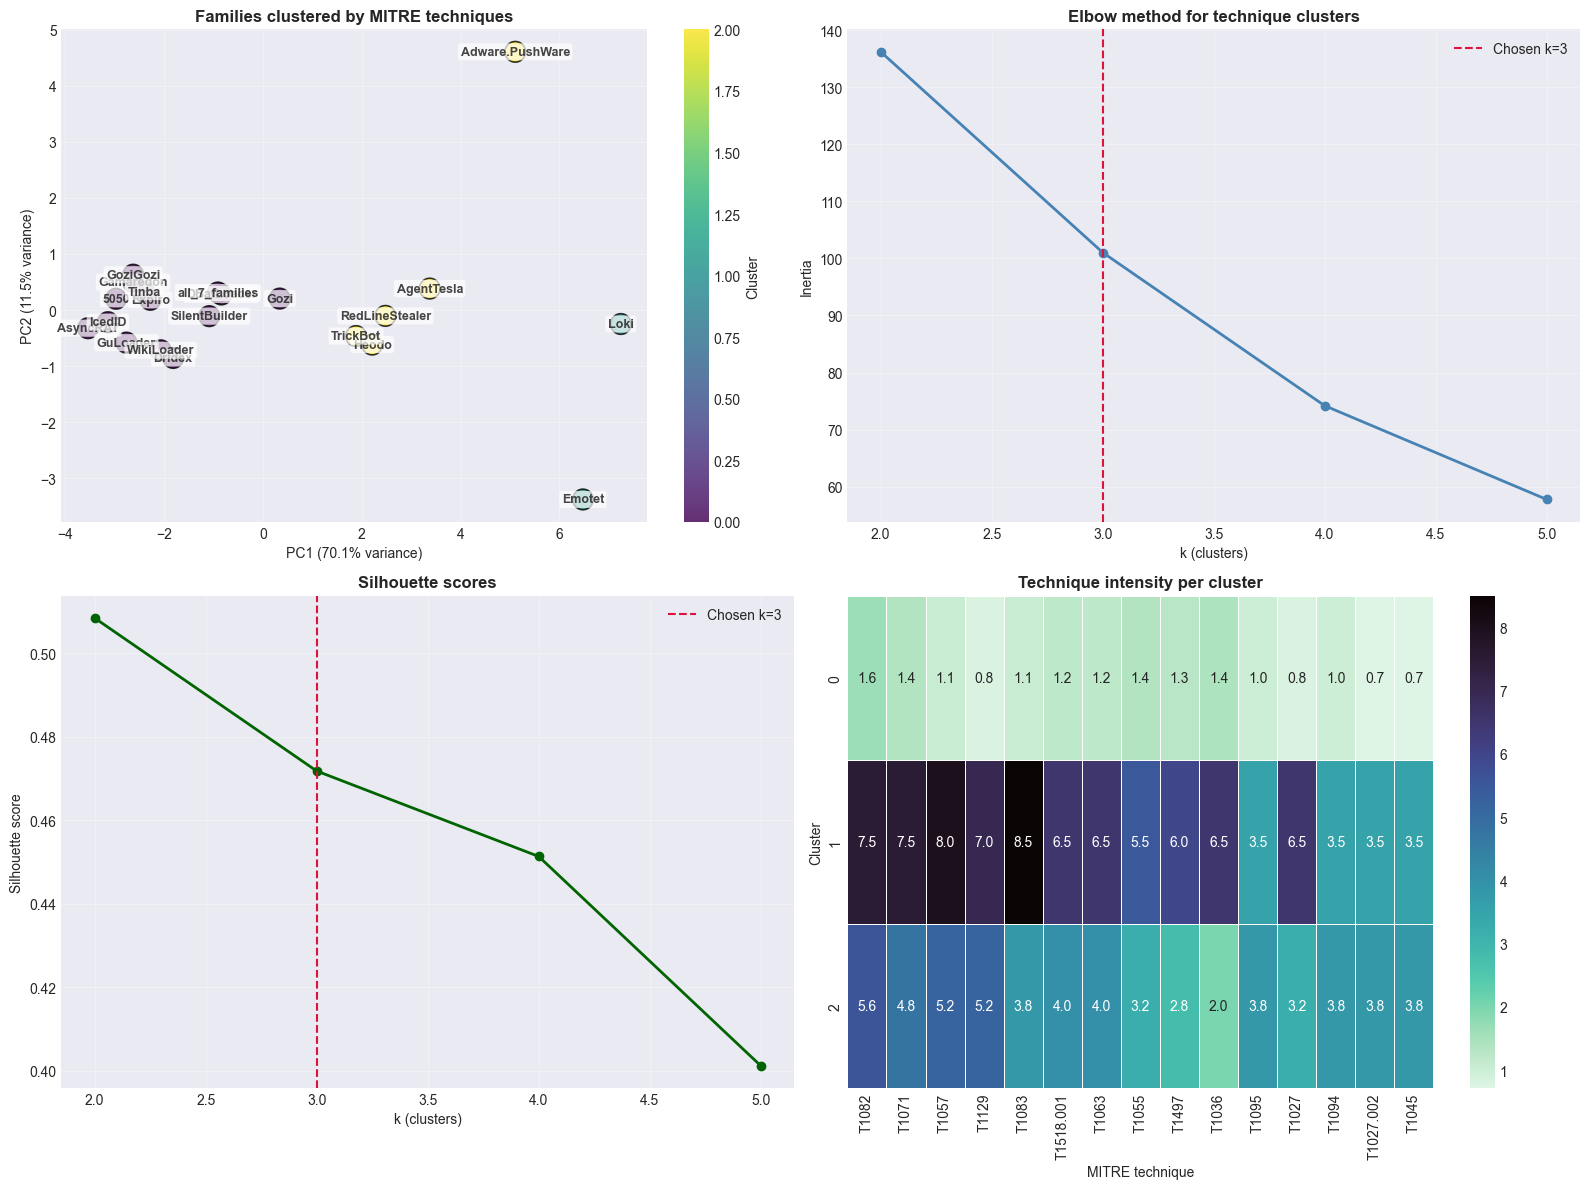


=== Technique Cluster Summary ===
Families clustered: 21 | Techniques considered: 15
k (fixed for visualization): 3

Cluster 0: 14 families
  Families: 5050, AsyncRAT, DBatLoader, Dridex, Expiro, Gamaredon, Gozi, GoziGozi, GuLoader, IcedID, SilentBuilder, Tinba, WikiLoader, all_7_families
  Top techniques: T1082, T1036, T1071

Cluster 1: 2 families
  Families: Emotet, Loki
  Top techniques: T1083, T1057, T1082

Cluster 2: 5 families
  Families: Adware.PushWare, AgentTesla, Heodo, RedLineStealer, TrickBot
  Top techniques: T1082, T1057, T1129


In [15]:
# Cluster malware families based on shared MITRE ATT&CK techniques
if df is not None and 'family' in df.columns and 'mitre_list' in df.columns:
    from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.metrics import silhouette_score
    import numpy as np

    technique_df = df.dropna(subset=['family']).copy()
    technique_df['mitre_list'] = technique_df['mitre_list'].apply(lambda x: x if isinstance(x, list) else safe_split(x))
    technique_df = technique_df[technique_df['mitre_list'].map(len) > 0]

    if not technique_df.empty and technique_df['family'].nunique() > 1:
        mlb = MultiLabelBinarizer()
        technique_matrix = mlb.fit_transform(technique_df['mitre_list'])
        technique_features = pd.DataFrame(technique_matrix, columns=mlb.classes_, index=technique_df.index)
        technique_features['family'] = technique_df['family'].values

        family_matrix = technique_features.groupby('family').sum()
        family_matrix = family_matrix.loc[family_matrix.sum(axis=1) > 0]

        if family_matrix.shape[1] == 0:
            print('✗ Not enough MITRE technique data to cluster families.')
        else:
            top_n = min(15, family_matrix.shape[1])
            top_techniques = family_matrix.sum().sort_values(ascending=False).head(top_n).index
            clustering_input = family_matrix[top_techniques]

            if clustering_input.shape[0] > 1:
                scaler = StandardScaler()
                scaled = scaler.fit_transform(clustering_input)

                max_k = min(5, clustering_input.shape[0])
                k_values = range(2, max_k + 1)
                inertias, silhouettes = [], []
                for k in k_values:
                    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
                    labels_temp = kmeans_temp.fit_predict(scaled)
                    inertias.append(kmeans_temp.inertia_)
                    silhouettes.append(silhouette_score(scaled, labels_temp) if len(set(labels_temp)) > 1 else np.nan)

                optimal_k = min(3, max_k)
                kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
                family_clusters = kmeans.fit_predict(scaled)

                pca_dims = 2 if scaled.shape[1] >= 2 else 1
                pca = PCA(n_components=pca_dims)
                pca_coords = pca.fit_transform(scaled)
                if pca_dims == 1:
                    pca_coords = np.column_stack([pca_coords[:, 0], np.zeros_like(pca_coords[:, 0])])
                pc1_var = pca.explained_variance_ratio_[0] * 100
                pc2_var = pca.explained_variance_ratio_[1] * 100 if pca_dims > 1 else 0.0

                fig, axes = plt.subplots(2, 2, figsize=(16, 12))

                scatter = axes[0, 0].scatter(
                    pca_coords[:, 0],
                    pca_coords[:, 1],
                    c=family_clusters,
                    cmap='viridis',
                    s=220,
                    alpha=0.8,
                    edgecolors='black',
                    linewidth=1.2
                )
                for idx, family_name in enumerate(clustering_input.index):
                    axes[0, 0].annotate(
                        family_name,
                        (pca_coords[idx, 0], pca_coords[idx, 1]),
                        fontsize=9,
                        fontweight='bold',
                        ha='center',
                        va='center',
                        alpha=0.85,
                        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, edgecolor='none')
                    )
                axes[0, 0].set_xlabel(f'PC1 ({pc1_var:.1f}% variance)')
                axes[0, 0].set_ylabel('PC2' + (f' ({pc2_var:.1f}% variance)' if pca_dims > 1 else ' (placeholder axis)'))
                axes[0, 0].set_title('Families clustered by MITRE techniques', fontweight='bold')
                axes[0, 0].grid(True, alpha=0.3)
                fig.colorbar(scatter, ax=axes[0, 0], label='Cluster')

                axes[0, 1].plot(list(k_values), inertias, 'o-', color='steelblue', linewidth=2)
                axes[0, 1].axvline(x=optimal_k, color='crimson', linestyle='--', label=f'Chosen k={optimal_k}')
                axes[0, 1].set_xlabel('k (clusters)')
                axes[0, 1].set_ylabel('Inertia')
                axes[0, 1].set_title('Elbow method for technique clusters', fontweight='bold')
                axes[0, 1].legend()
                axes[0, 1].grid(True, alpha=0.3)

                axes[1, 0].plot(list(k_values), silhouettes, 'o-', color='darkgreen', linewidth=2)
                axes[1, 0].axvline(x=optimal_k, color='crimson', linestyle='--', label=f'Chosen k={optimal_k}')
                axes[1, 0].set_xlabel('k (clusters)')
                axes[1, 0].set_ylabel('Silhouette score')
                axes[1, 0].set_title('Silhouette scores', fontweight='bold')
                axes[1, 0].legend()
                axes[1, 0].grid(True, alpha=0.3)

                cluster_profiles = clustering_input.copy()
                cluster_profiles['cluster'] = family_clusters
                heatmap_data = cluster_profiles.groupby('cluster')[top_techniques].mean().sort_index()
                sns.heatmap(
                    heatmap_data,
                    cmap='mako_r',
                    annot=True,
                    fmt='.1f',
                    linewidths=0.5,
                    ax=axes[1, 1]
                )
                axes[1, 1].set_title('Technique intensity per cluster', fontweight='bold')
                axes[1, 1].set_xlabel('MITRE technique')
                axes[1, 1].set_ylabel('Cluster')

                plt.tight_layout()
                plt.show()

                print('\n=== Technique Cluster Summary ===')
                print(f'Families clustered: {clustering_input.shape[0]} | Techniques considered: {len(top_techniques)}')
                print(f'k (fixed for visualization): {optimal_k}')
                for cluster_id in range(optimal_k):
                    fam_mask = family_clusters == cluster_id
                    families_in_cluster = clustering_input.index[fam_mask]
                    top_cluster_techniques = heatmap_data.loc[cluster_id].sort_values(ascending=False).head(3).index.tolist()
                    print(f"\nCluster {cluster_id}: {len(families_in_cluster)} families")
                    print('  Families:', ', '.join(families_in_cluster))
                    print('  Top techniques:', ', '.join(top_cluster_techniques))
            else:
                print('✗ Need at least two families with MITRE data for clustering.')
    else:
        print('✗ MITRE techniques column is empty or missing family labels.')
else:
    print('✗ Data frame missing or required columns unavailable.')
